In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Read the CSV file skipping the first 20 rows

df = pd.read_csv(r'Maroua_Hour_1980-01-01_2020-12-31_543627210.csv' , low_memory=False, header=22, sep=';')

# Save the DataFrame to a new CSV file

df.to_csv('Maroua3.csv', index=False)
df.head()


# Date UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  1980-01-01   01:00       293.23              25.33    963.18        4.93   
1  1980-01-01   02:00       292.54              26.56    962.91        4.70   
2  1980-01-01   03:00       291.81              28.10    962.98        4.42   
3  1980-01-01   04:00       291.16              29.71    963.50        4.32   
4  1980-01-01   05:00       290.48              31.57    964.17        4.16   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          349.55       0.0       0.0         0.0                     0.0  
1          351.43       0.0       0.0         0.0                     0.0  
2          353.77       0.0       0.0         0.0                     0.0  
3          358.58       0.0       0.0         0.0                     0.0  
4            3.22       0.0       0.0         0.0                     0.0

In [5]:
df = pd.read_csv('Maroua3.csv', sep=',', header=0)

# Rename the first column by removing the '#'character

df.rename(columns={df.columns[0]: df.columns[0].lstrip(' #')}, inplace=True)
df.head()



Date UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  1980-01-01   01:00       293.23              25.33    963.18        4.93   
1  1980-01-01   02:00       292.54              26.56    962.91        4.70   
2  1980-01-01   03:00       291.81              28.10    962.98        4.42   
3  1980-01-01   04:00       291.16              29.71    963.50        4.32   
4  1980-01-01   05:00       290.48              31.57    964.17        4.16   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          349.55       0.0       0.0         0.0                     0.0  
1          351.43       0.0       0.0         0.0                     0.0  
2          353.77       0.0       0.0         0.0                     0.0  
3          358.58       0.0       0.0         0.0                     0.0  
4            3.22       0.0       0.0         0.0                     0.0

In [6]:
# Check for null values in each column
null_columns = df.isna().any()
# Check for null values in the entire DataFrame
null_dataframe = df.isna().any().any()
# Display the results
print("Null values in each column:\n", null_columns)
print("\nNull values in the entire DataFrame:", null_dataframe)

Null values in each column:
 Date                      False
UT time                   False
Temperature               False
Relative Humidity         False
Pressure                  False
Wind speed                False
Wind direction            False
Rainfall                  False
Snowfall                  False
Snow depth                False
Short-wave irradiation    False
dtype: bool

Null values in the entire DataFrame: False


In [7]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Convert the date column to ordinal representation
df['Date'] = df['Date'].apply(lambda x: x.toordinal())
# Check the updated DataFrame
df.head()

Date UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815   01:00       293.23              25.33    963.18        4.93   
1  722815   02:00       292.54              26.56    962.91        4.70   
2  722815   03:00       291.81              28.10    962.98        4.42   
3  722815   04:00       291.16              29.71    963.50        4.32   
4  722815   05:00       290.48              31.57    964.17        4.16   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          349.55       0.0       0.0         0.0                     0.0  
1          351.43       0.0       0.0         0.0                     0.0  
2          353.77       0.0       0.0         0.0                     0.0  
3          358.58       0.0       0.0         0.0                     0.0  
4            3.22       0.0       0.0         0.0                     0.0

In [8]:
# Split the time string into hours and minutes
split_time = df['UT time'].str.split(':')
# Extract hours and minutes from the split result
hours = split_time.str[0].astype(int)
minutes = split_time.str[1].astype(int)
# Combine hours and minutes into a single numerical representation (e.g., minutes since midnight)
time_numeric = hours * 60 + minutes
# Replace the original time column with the new numerical representation
df['UT time'] = time_numeric
# Check the updated DataFrame
df.head()

Date  UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815       60       293.23              25.33    963.18        4.93   
1  722815      120       292.54              26.56    962.91        4.70   
2  722815      180       291.81              28.10    962.98        4.42   
3  722815      240       291.16              29.71    963.50        4.32   
4  722815      300       290.48              31.57    964.17        4.16   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          349.55       0.0       0.0         0.0                     0.0  
1          351.43       0.0       0.0         0.0                     0.0  
2          353.77       0.0       0.0         0.0                     0.0  
3          358.58       0.0       0.0         0.0                     0.0  
4            3.22       0.0       0.0         0.0                     0.0

In [9]:

# Convert the wind speed data to the desired units (e.g., from m/s to knots)

conversion_factor = 0.0000036
df['Short-wave irradiation'] = df['Short-wave irradiation'] * conversion_factor  # Conversion from m/s to knots

# Optionally, drop the original 'Wind Speed' column
# df.drop(columns=['Wind Speed'], inplace=True)

df.head()

Date  UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815       60       293.23              25.33    963.18        4.93   
1  722815      120       292.54              26.56    962.91        4.70   
2  722815      180       291.81              28.10    962.98        4.42   
3  722815      240       291.16              29.71    963.50        4.32   
4  722815      300       290.48              31.57    964.17        4.16   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          349.55       0.0       0.0         0.0                     0.0  
1          351.43       0.0       0.0         0.0                     0.0  
2          353.77       0.0       0.0         0.0                     0.0  
3          358.58       0.0       0.0         0.0                     0.0  
4            3.22       0.0       0.0         0.0                     0.0

In [10]:
column_list = df.columns.tolist()
column_list

['Date',
 'UT time',
 'Temperature',
 'Relative Humidity',
 'Pressure',
 'Wind speed',
 'Wind direction',
 'Rainfall',
 'Snowfall',
 'Snow depth',
 'Short-wave irradiation']

In [11]:
# Drop the columns that are not in correlation
df = df.drop(columns=[
                      'Snowfall',
                      'Snow depth',
                    ])
# Check the updated DataFrame
df.head()


Date  UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815       60       293.23              25.33    963.18        4.93   
1  722815      120       292.54              26.56    962.91        4.70   
2  722815      180       291.81              28.10    962.98        4.42   
3  722815      240       291.16              29.71    963.50        4.32   
4  722815      300       290.48              31.57    964.17        4.16   

   Wind direction  Rainfall  Short-wave irradiation  
0          349.55       0.0                     0.0  
1          351.43       0.0                     0.0  
2          353.77       0.0                     0.0  
3          358.58       0.0                     0.0  
4            3.22       0.0                     0.0

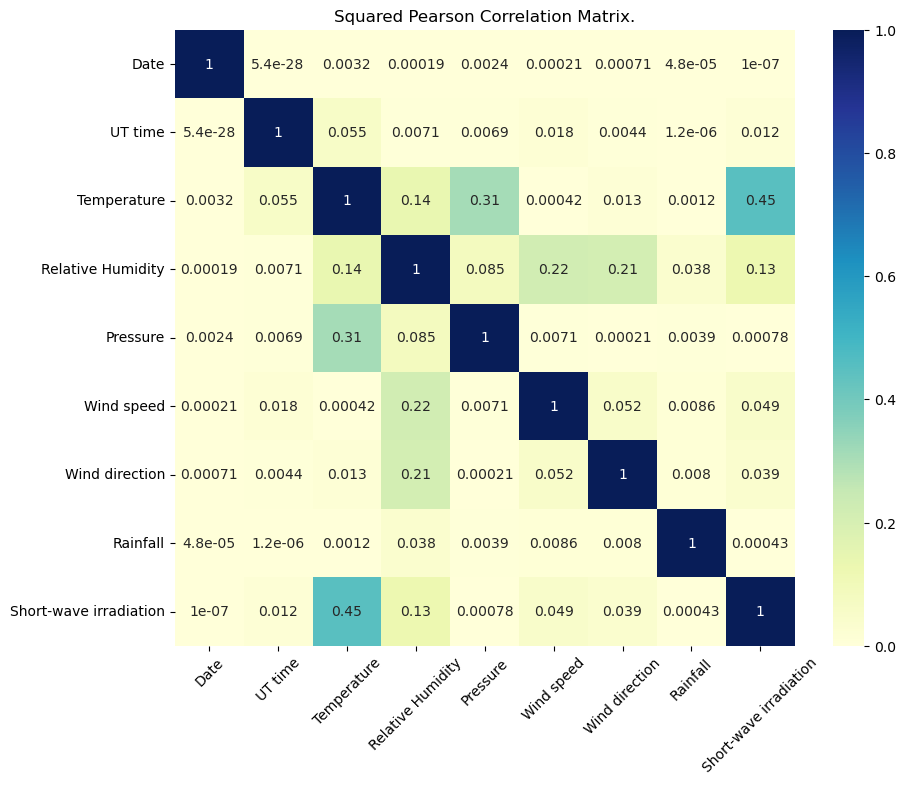

In [11]:
import seaborn as sns

# Compute correlation matrix using Pearson correlation method

corr_matrix = df.corr(method='pearson') ** 2 # Square each correlation coefficient

# Plot correlation matrix as a heatmap

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=0, vmax=1)
# Set the feature names as labels for both axes
plt.xticks(np.arange(len(corr_matrix.columns)) + 0.5, corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)) + 0.5, corr_matrix.columns, rotation=0)
plt.title("Squared Pearson Correlation Matrix.")
plt.show()

In [12]:
df.corr()


Date       UT time  Temperature  \
Date                    1.000000e+00 -2.333244e-14     0.056590   
UT time                -2.333244e-14  1.000000e+00     0.235119   
Temperature             5.658974e-02  2.351186e-01     1.000000   
Relative Humidity      -1.360902e-02 -8.420012e-02    -0.373751   
Pressure                4.854230e-02 -8.296674e-02    -0.556230   
Wind speed             -1.439992e-02 -1.348708e-01     0.020390   
Wind direction         -2.672027e-02 -6.611543e-02    -0.113071   
Rainfall                6.963016e-03 -1.107623e-03    -0.034108   
Short-wave irradiation -3.211713e-04 -1.100065e-01     0.670872   

                        Relative Humidity  Pressure  Wind speed  \
Date                            -0.013609  0.048542   -0.014400   
UT time                         -0.084200 -0.082967   -0.134871   
Temperature                     -0.373751 -0.556230    0.020390   
Relative Humidity                1.000000  0.290977   -0.466285   
Pressure                         0.290977  1.000000    0.084472   
Wind speed                      -0.466285  0.084472    1.000000   
Wind direction                   0.459852 -0.014359   -0.227566   
Rainfall                         0.195175  0.062716   -0.092718   
Short-wave irradiation          -0.357365 -0.027995    0.221524   

                        Wind direction  Rainfall  Short-wave irradiation  
Date                         -0.026720  0.006963               -0.000321  
UT time                      -0.066115 -0.001108               -0.110006  
Temperature                  -0.113071 -0.034108                0.670872  
Relative Humidity             0.459852  0.195175               -0.357365  
Pressure                     -0.014359  0.062716               -0.027995  
Wind speed                   -0.227566 -0.092718                0.221524  
Wind direction                1.000000  0.089560               -0.196886  
Rainfall                      0.089560  1.000000               -0.020660  
Short-wave irradiation       -0.196886 -0.020660                1.000000

In [13]:
# Drop the columns that are not in correlation
df = df.drop(columns=['Date',
                      'Temperature',
                      'Pressure',
                      'Wind direction',
                      'Rainfall',
                    ])
# Check the updated DataFrame
df.head()


UT time  Relative Humidity  Wind speed  Short-wave irradiation
0       60              25.33        4.93                     0.0
1      120              26.56        4.70                     0.0
2      180              28.10        4.42                     0.0
3      240              29.71        4.32                     0.0
4      300              31.57        4.16                     0.0

In [14]:
 #Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# Split the dataset
train, valid, test = np.split(df, [int(0.6*len(df)), int(0.8*len(df))])
# Check the sizes of the splits
print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(valid)}")
print(f"Test set size: {len(test)}")

Training set size: 215654
Validation set size: 71885
Test set size: 71885


C:\Users\Millen\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [15]:
from sklearn.preprocessing import RobustScaler
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
# Initialize the scaler
    scaler = RobustScaler()
# Fit the scaler on the training data and transform it
    X = scaler.fit_transform(X)
    return X, y

train_X_scaled, train_y = scale_dataset(train)
valid_X_scaled, valid_y = scale_dataset(valid)
test_X_scaled, test_y = scale_dataset(test)


In [16]:

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(predictions, test_y, title):
    # Calculate R²
    r2_rf = r2_score(test_y, predictions)
    # Calculate RMSE
    rmse_rf = np.sqrt(mean_squared_error(test_y, predictions))
    # Calculate Relative RMSE (rRMSE)
    rrmse_rf = rmse_rf / np.std(test_y)
    # Calculate Mean Bias Error (MBE)
    mbe_rf = np.mean(predictions - test_y)
    # Calculate Mean Absolute Bias Error (MABE)
    mabe_rf = np.mean(np.abs(predictions - test_y))
    # Calculate Mean Absolute Error (MAE)
    mae_rf = mean_absolute_error(test_y, predictions)
    # Calculate Mean Squared Error (MSE)
    mse_rf = mean_squared_error(test_y, predictions)
    # Calculate Akaike Information Criterion (AIC)
    aic_rf = len(test_y) * np.log(mse_rf) + 2

    # Create a DataFrame to store the evaluation metrics
    evaluation_table = pd.DataFrame({
        'Metric': ['R²', 'RMSE', 'rRMSE', 'MBE', 'MABE', 'MAE', 'MSE', 'AIC'],
        'Value': [r2_rf, rmse_rf, rrmse_rf, mbe_rf, mabe_rf, mae_rf, mse_rf, aic_rf]
    })
    # Print the evaluation table with formatted values
    print(title)
    pd.options.display.float_format = '{:.6f}'.format
    print(evaluation_table)

    return evaluation_table

# Example usage (assuming you have predictions and test_y already):
# evaluation_table = evaluate_model(predictions, test_y, "Model Evaluation Metrics")

In [17]:
import matplotlib.pyplot as plt
def plot_actual_vs_predicted(test_y, predictions, label, sample_size=200):

    # Calculate error curve
    error_curve = test_y - predictions
    # Set figure size
    plt.figure(figsize=(20, 6))
    # Plot actual values from the test set and predictions
    plt.subplot(2, 1, 1)
    plt.plot(range(sample_size), test_y[:sample_size], color='darkblue', label='Actual', linewidth=2)
    plt.plot(range(sample_size), predictions[:sample_size], color='red', label=label, linewidth=2)
    plt.xlabel('Observation')
    plt.ylabel('Wind speed m/s')
    plt.legend()
    plt.ylim(bottom=0, top=max(max(test_y), max(predictions))) # Set y-axis limits to start from 0
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    # Plot error curve and fill between the curve and y=0
    plt.subplot(2, 1, 2)
    plt.plot(range(sample_size), error_curve[:sample_size], color='black', label='Error Magnitude', linewidth=2)
    plt.fill_between(range(sample_size), error_curve[:sample_size], 0, color='red', interpolate=True)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Observation')
    plt.ylabel('Error m/s')
    plt.ylim(bottom=min(error_curve), top=max(error_curve)) # Set y-axis limits
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    plt.legend()
    # Show plot
    plt.tight_layout()
    plt.show()


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a Gradient Boosting Machine regressor model
model_gbm = GradientBoostingRegressor(random_state=1000)
# Train the model
model_gbm.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_gbm = model_gbm.predict(test_X_scaled)
# Evaluate the model
evaluate_model(predictions_gbm, test_y, "Maroua South wes Metrics Evaluation for Gradient Booting Machine Models")


Maroua South wes Metrics Evaluation for Gradient Booting Machine Models
  Metric           Value
0     R²        0.863696
1   RMSE        0.000427
2  rRMSE        0.369193
3    MBE       -0.000011
4   MABE        0.000273
5    MAE        0.000273
6    MSE        0.000000
7    AIC -1115444.281606


Metric           Value
0     R²        0.863696
1   RMSE        0.000427
2  rRMSE        0.369193
3    MBE       -0.000011
4   MABE        0.000273
5    MAE        0.000273
6    MSE        0.000000
7    AIC -1115444.281606

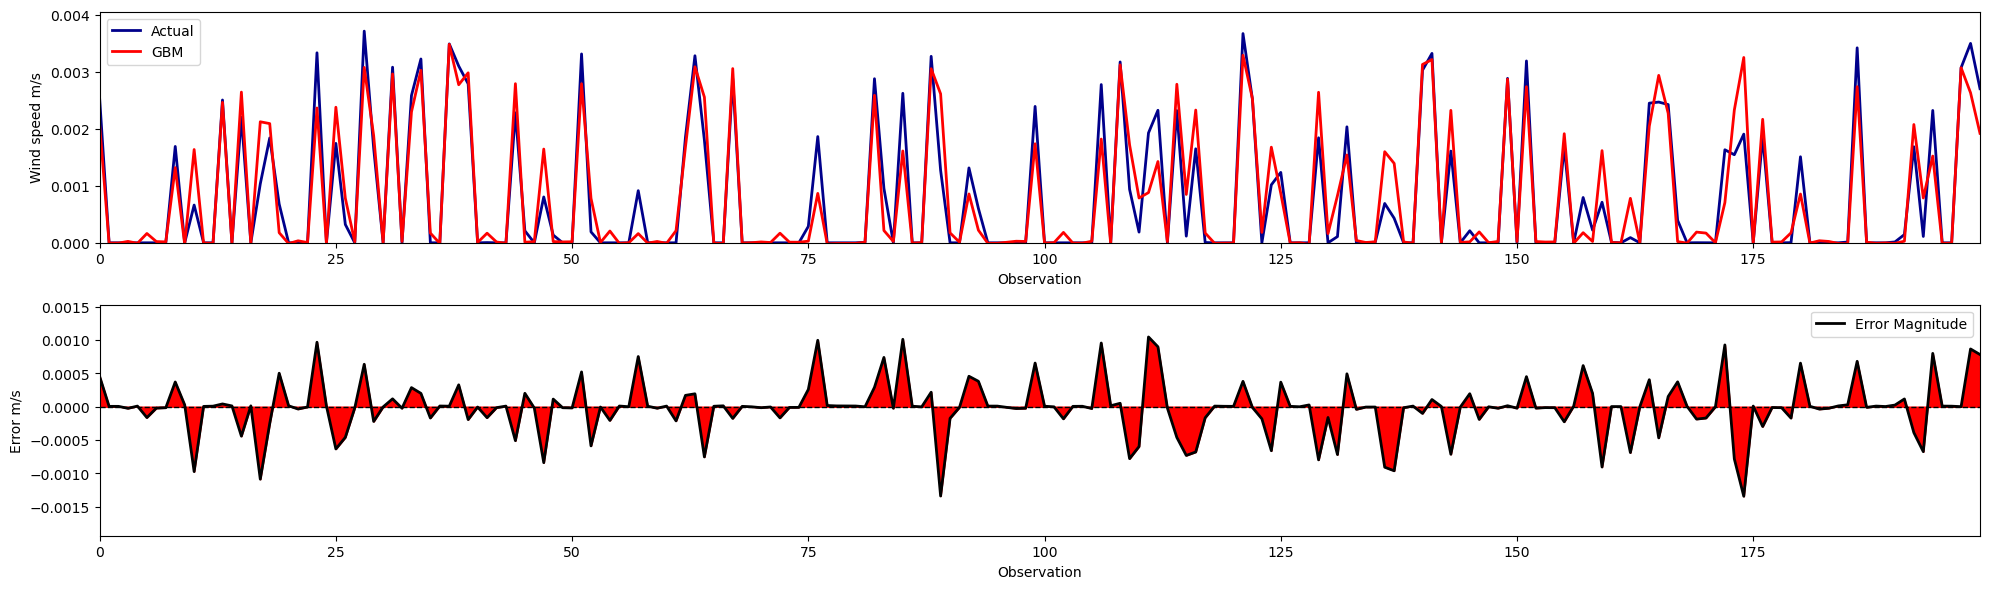

In [19]:
plot_actual_vs_predicted(test_y, predictions_gbm, label='GBM')


In [20]:
from sklearn.svm import SVR
# Create and train the linear SVR model
svr_poly = SVR(kernel='linear')
svr_poly.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_svm = svr_poly.predict(test_X_scaled)
evaluate_model(predictions_svm, test_y, "maroua south west Metrics Evaluation for Svm Model")


maroua south west Metrics Evaluation for Svm Model
  Metric          Value
0     R²      -1.007710
1   RMSE       0.001639
2  rRMSE       1.416937
3    MBE       0.001161
4   MABE       0.001495
5    MAE       0.001495
6    MSE       0.000003
7    AIC -922083.419724


Metric          Value
0     R²      -1.007710
1   RMSE       0.001639
2  rRMSE       1.416937
3    MBE       0.001161
4   MABE       0.001495
5    MAE       0.001495
6    MSE       0.000003
7    AIC -922083.419724

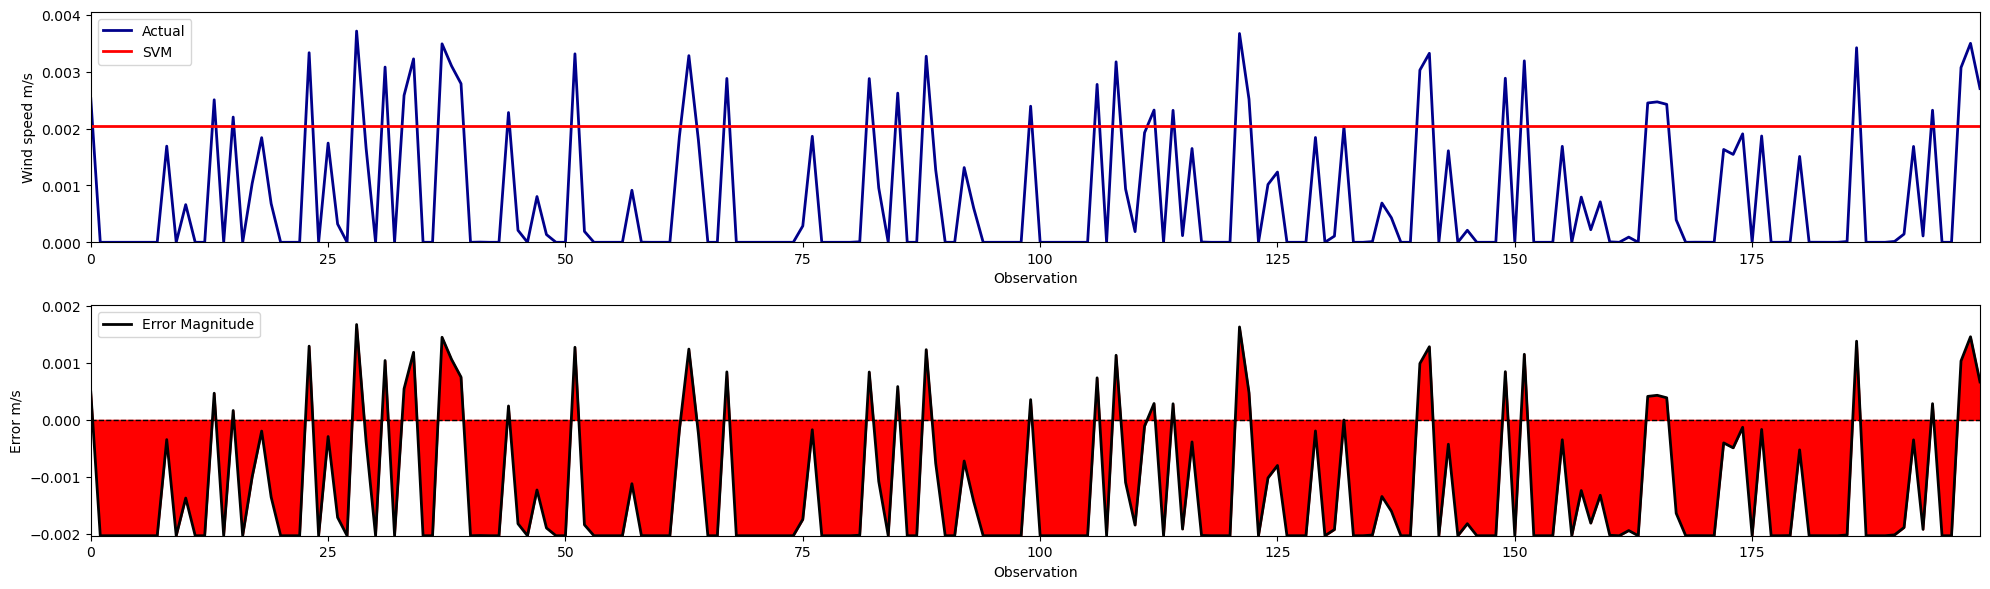

In [21]:
plot_actual_vs_predicted(test_y, predictions_svm, label='SVM')

In [22]:
from sklearn.neighbors import KNeighborsRegressor
# Create a k-Nearest Neighbors regressor model with k=5
model_knn = KNeighborsRegressor(n_neighbors=5)
# Train the model
model_knn.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_knn = model_knn.predict(test_X_scaled)
# Evaluate the model
evaluate_model(predictions_knn, test_y, "Maroua Metrics Evaluation for k-Nearest Neighbors Model (k=5)")


Maroua Metrics Evaluation for k-Nearest Neighbors Model (k=5)
  Metric           Value
0     R²        0.866041
1   RMSE        0.000423
2  rRMSE        0.366005
3    MBE       -0.000021
4   MABE        0.000262
5    MAE        0.000262
6    MSE        0.000000
7    AIC -1116691.475408


Metric           Value
0     R²        0.866041
1   RMSE        0.000423
2  rRMSE        0.366005
3    MBE       -0.000021
4   MABE        0.000262
5    MAE        0.000262
6    MSE        0.000000
7    AIC -1116691.475408

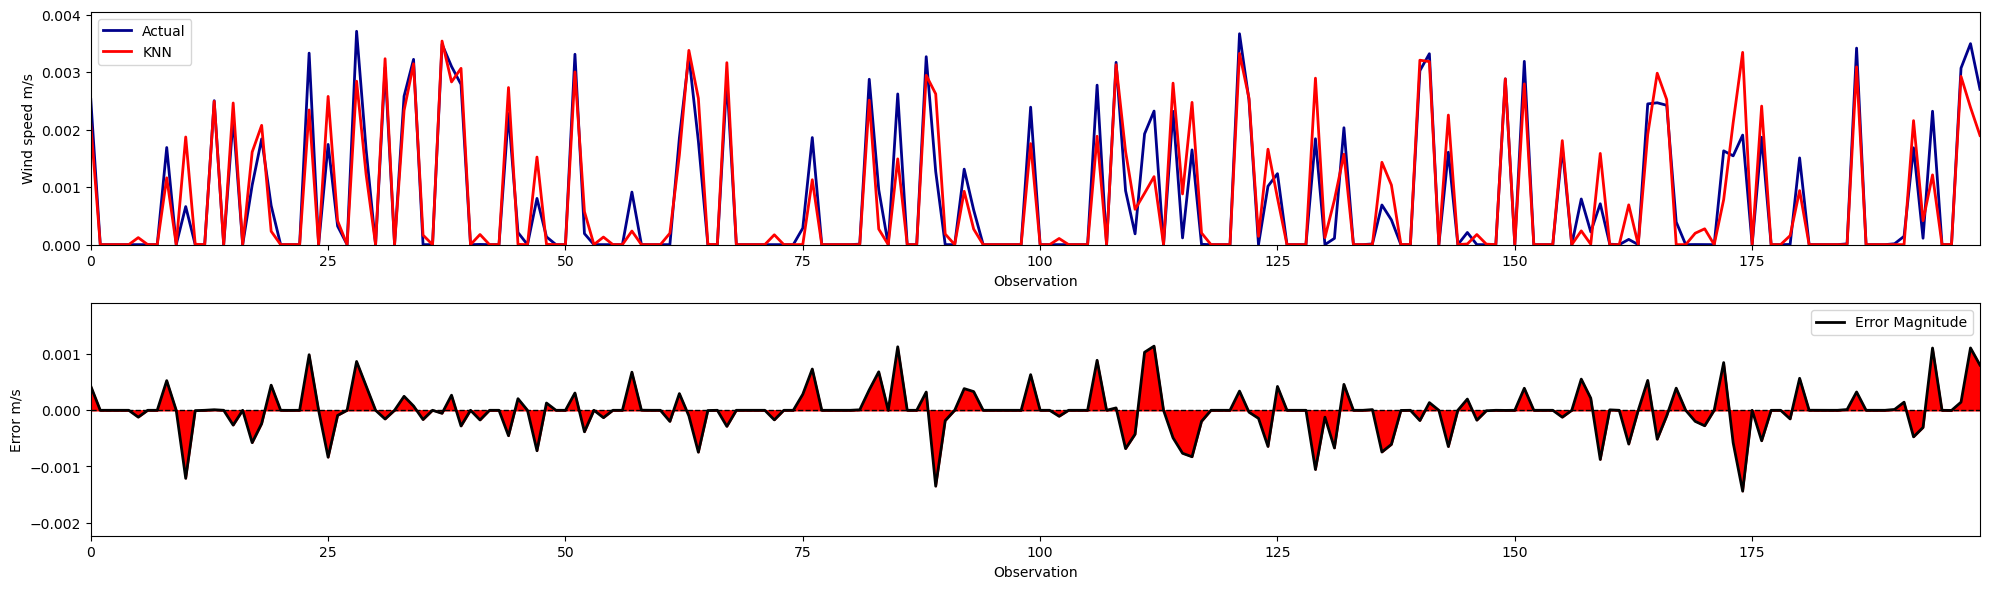

In [23]:
plot_actual_vs_predicted(test_y, predictions_knn, label='KNN')


In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
# Reshape data for LSTM (assuming train_X_scaled and test_X_scaled are 3D arrays)
train_X_lstm = train_X_scaled.reshape((train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
test_X_lstm = test_X_scaled.reshape((test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))
# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(train_X_lstm.shape[1], train_X_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
# Train the LSTM model
model_lstm.fit(train_X_lstm, train_y, epochs=10, batch_size=16, verbose=0)
# Make predictions on the test set
predictions_lstm = model_lstm.predict(test_X_lstm)
# Flatten predictions
predictions_lstm = predictions_lstm.flatten()
# Evaluate the model
evaluate_model(predictions_lstm, test_y, "Buea south west Metrics Evaluation for LSTM Model")


2247/2247 [==============================] - 6s 2ms/step
Buea south west Metrics Evaluation for LSTM Model
  Metric           Value
0     R²        0.855120
1   RMSE        0.000440
2  rRMSE        0.380632
3    MBE        0.000055
4   MABE        0.000328
5    MAE        0.000328
6    MSE        0.000000
7    AIC -1111057.715059


Metric           Value
0     R²        0.855120
1   RMSE        0.000440
2  rRMSE        0.380632
3    MBE        0.000055
4   MABE        0.000328
5    MAE        0.000328
6    MSE        0.000000
7    AIC -1111057.715059

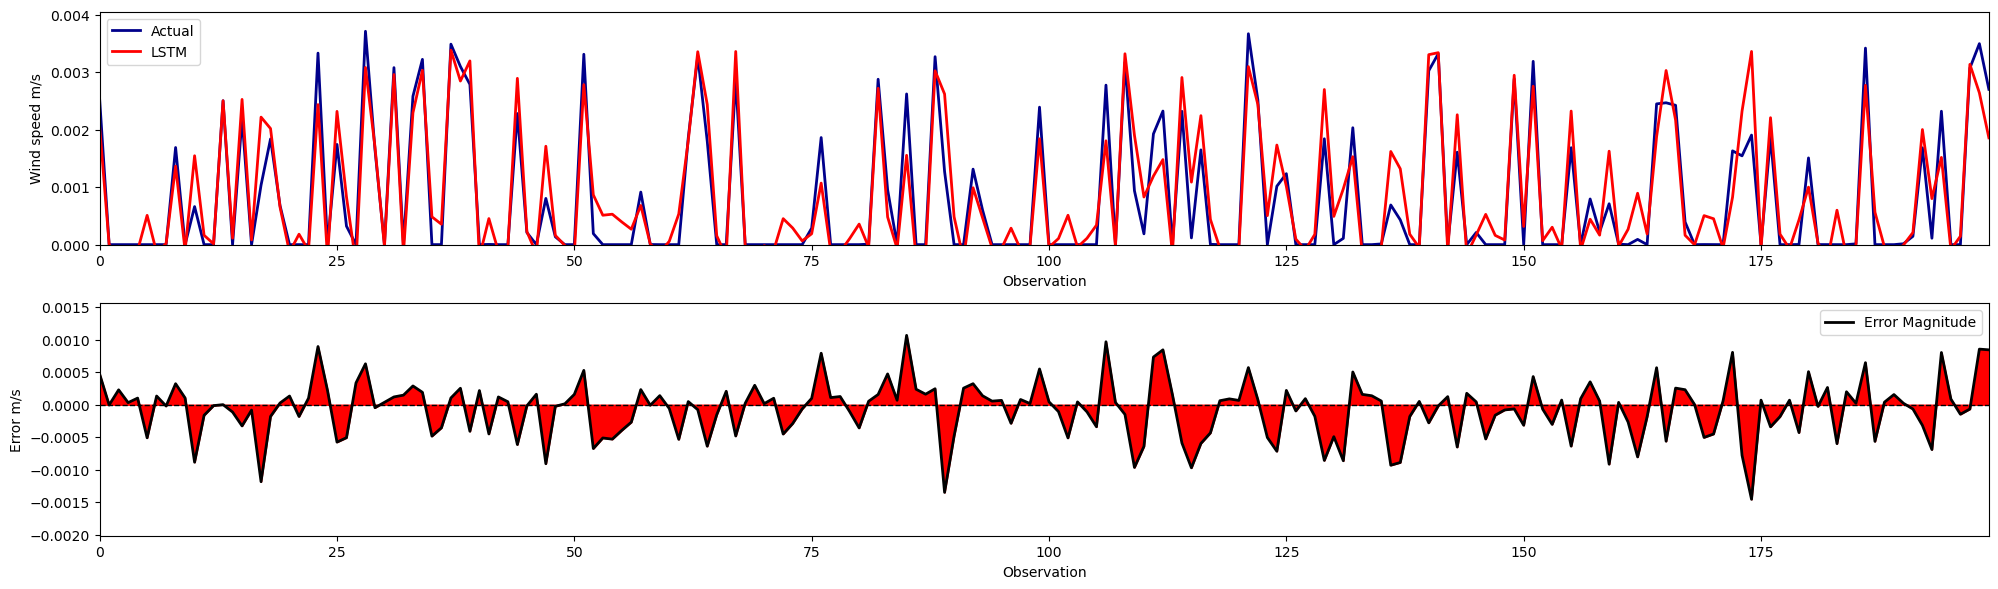

In [25]:
plot_actual_vs_predicted(test_y, predictions_lstm, label='LSTM')


In [26]:
from sklearn.neural_network import MLPRegressor
# Create a Multi-Layer Perceptron (MLP) regressor model
model_ann = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
# Train the ANN model
model_ann.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_ann = model_ann.predict(test_X_scaled)
# Evaluate the model
evaluate_model(predictions_ann, test_y, "ANN Metrics Evaluation")

ANN Metrics Evaluation
  Metric           Value
0     R²        0.671222
1   RMSE        0.000663
2  rRMSE        0.573392
3    MBE       -0.000313
4   MABE        0.000517
5    MAE        0.000517
6    MSE        0.000000
7    AIC -1052149.820704


Metric           Value
0     R²        0.671222
1   RMSE        0.000663
2  rRMSE        0.573392
3    MBE       -0.000313
4   MABE        0.000517
5    MAE        0.000517
6    MSE        0.000000
7    AIC -1052149.820704

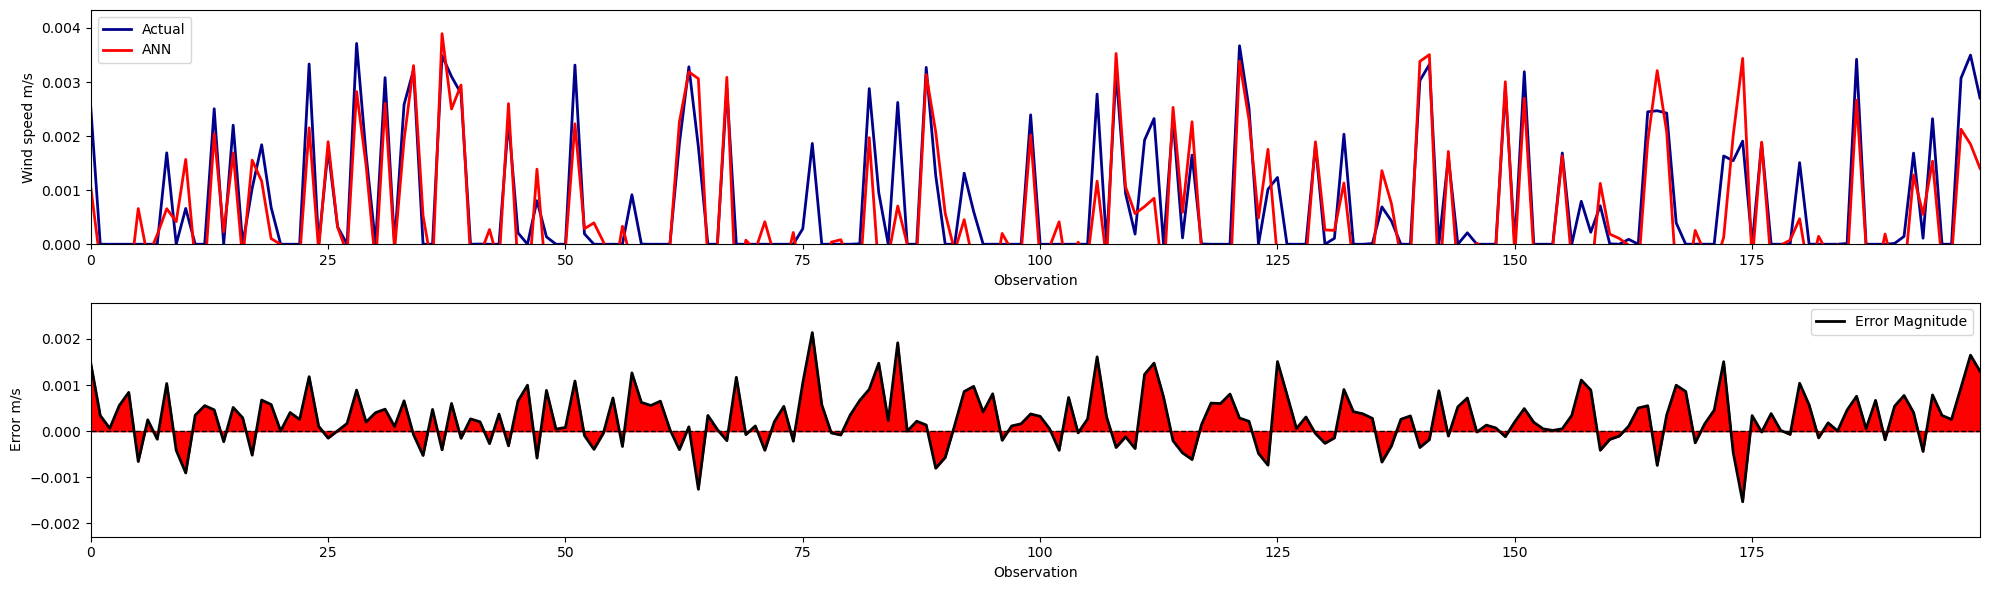

In [27]:
plot_actual_vs_predicted(test_y, predictions_ann, label='ANN')

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(predictions, test_y, title, batch_size=1000):
    # Ensure batch_size is an integer
    batch_size = int(batch_size)

    # Calculate metrics in batches
    rmse_batches = []
    mbe_batches = []
    mabe_batches = []
    mae_batches = []
    mse_batches = []
    for i in range(0, len(predictions), batch_size):
        batch_predictions = predictions[i:i+batch_size]
        batch_test_y = test_y[i:i+batch_size]

        # RMSE
        rmse_batches.append(np.sqrt(np.mean((batch_predictions - batch_test_y)**2)))
        # MBE
        mbe_batches.append(np.mean(batch_predictions - batch_test_y))
        # MABE
        mabe_batches.append(np.mean(np.abs(batch_predictions - batch_test_y)))
        # MAE
        mae_batches.append(mean_absolute_error(batch_test_y, batch_predictions))
        # MSE
        mse_batches.append(mean_squared_error(batch_test_y, batch_predictions))

    # Aggregate metrics
    rmse_rf = np.mean(rmse_batches)
    mbe_rf = np.mean(mbe_batches)
    mabe_rf = np.mean(mabe_batches)
    mae_rf = np.mean(mae_batches)
    mse_rf = np.mean(mse_batches)

    # Calculate other metrics
    r2_rf = r2_score(test_y, predictions)
    rrmse_rf = rmse_rf / np.std(test_y)
    rrmse = rmse_rf / np.mean(test_y)

    # Calculate Akaike Information Criterion (AIC)
    aic_rf = len(test_y) * np.log(mse_rf) + 2

    # Create a DataFrame to store the evaluation metrics
    evaluation_table = pd.DataFrame({
        'Metric': ['R²', 'RMSE', 'rRMSE', 'MBE', 'MABE', 'MAE', 'MSE', 'AIC'],
        'Value': [r2_rf, rmse_rf, rrmse, mbe_rf, mabe_rf, mae_rf, mse_rf, aic_rf]
    })

    # Print the evaluation table with formatted values
    pd.options.display.float_format = '{:.6f}'.format
    print(title)
    print(evaluation_table)

    return evaluation_table

# Example usage (assuming you have predictions and test_y already):
# evaluation_table = evaluate_model(predictions, test_y, "Model Evaluation Metrics")

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_vs_predicted(test_y, predictions, label, sample_size=200):
    # Initialize error curve array
    error_curve = np.zeros_like(test_y)
    
    # Calculate error curve in batches
    for i in range(0, len(test_y), sample_size):
        batch_test_y = test_y[i:i+sample_size]
        batch_predictions = predictions[i:i+sample_size].flatten() # Flatten predictions to match batch_test_y shape
        error_curve[i:i+len(batch_test_y)] = batch_test_y - batch_predictions
    
    # Set figure size
    plt.figure(figsize=(20, 6))
    
    # Plot actual values from the test set and predictions
    plt.subplot(2, 1, 1)
    plt.plot(range(sample_size), test_y[:sample_size], color='darkblue', label='Actual', linewidth=2)
    plt.plot(range(sample_size), predictions[:sample_size], color='red', label=label, linewidth=2)
    plt.xlabel('Observation')
    plt.ylabel('Wind speed m/s')
    plt.legend()
    plt.ylim(bottom=0, top=max(max(test_y), max(predictions))) # Set y-axis limits to start from 0
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    
    # Plot error curve and fill between the curve and y=0
    plt.subplot(2, 1, 2)
    plt.plot(range(sample_size), error_curve[:sample_size], color='black', label='Error Magnitude', linewidth=2)
    plt.fill_between(range(sample_size), error_curve[:sample_size], 0, color='red', interpolate=True)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Observation')
    plt.ylabel('Error m/s')
    plt.ylim(bottom=min(error_curve), top=max(error_curve)) # Set y-axis limits
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    plt.legend()
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot + tf.keras.backend.epsilon())

input_shape = train_X_scaled.shape[1]

# Define the model architecture
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1) # Output layer with one unit for regression
])

# Compile the model with custom R² metric
model_dl.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])

# Train the model
history = model_dl.fit(train_X_scaled, train_y, epochs=5, batch_size=8, validation_split=0.2, verbose=1)

# Make predictions on the test set
predictions_dl = model_dl.predict(test_X_scaled)

# Evaluate the model
results = model_dl.evaluate(test_X_scaled, test_y, verbose=0)

# Print all metrics
metric_names = model_dl.metrics_names
for i, metric_name in enumerate(metric_names):
    print(f"{metric_name}: {results[i]}")

# Evaluate the model using your custom evaluation function
evaluation_table_dl = evaluate_model(predictions_dl, test_y, "FNN Metrics Evaluation", batch_size=1000)

Epoch 1/5
21566/21566 [==============================] - 92s 4ms/step - loss: 2.3444e-05 - root_mean_squared_error: 0.0048 - r_squared: -41.0225 - val_loss: 7.6746e-08 - val_root_mean_squared_error: 2.7703e-04 - val_r_squared: 0.8957
Epoch 2/5
21566/21566 [==============================] - 68s 3ms/step - loss: 9.3969e-08 - root_mean_squared_error: 3.0654e-04 - r_squared: 0.8623 - val_loss: 7.3113e-08 - val_root_mean_squared_error: 2.7039e-04 - val_r_squared: 0.8875
Epoch 4/5
21566/21566 [==============================] - 63s 3ms/step - loss: 9.2606e-08 - root_mean_squared_error: 3.0431e-04 - r_squared: 0.8659 - val_loss: 5.6034e-08 - val_root_mean_squared_error: 2.3671e-04 - val_r_squared: 0.9323
Epoch 5/5
2247/2247 [==============================] - 5s 2ms/step
loss: 2.4705900614208076e-07
root_mean_squared_error: 0.0004970502923242748
r_squared: 0.7982676029205322
FNN Metrics Evaluation
  Metric           Value
0     R²        0.815372
1   RMSE        0.001572
2  rRMSE        1.79691

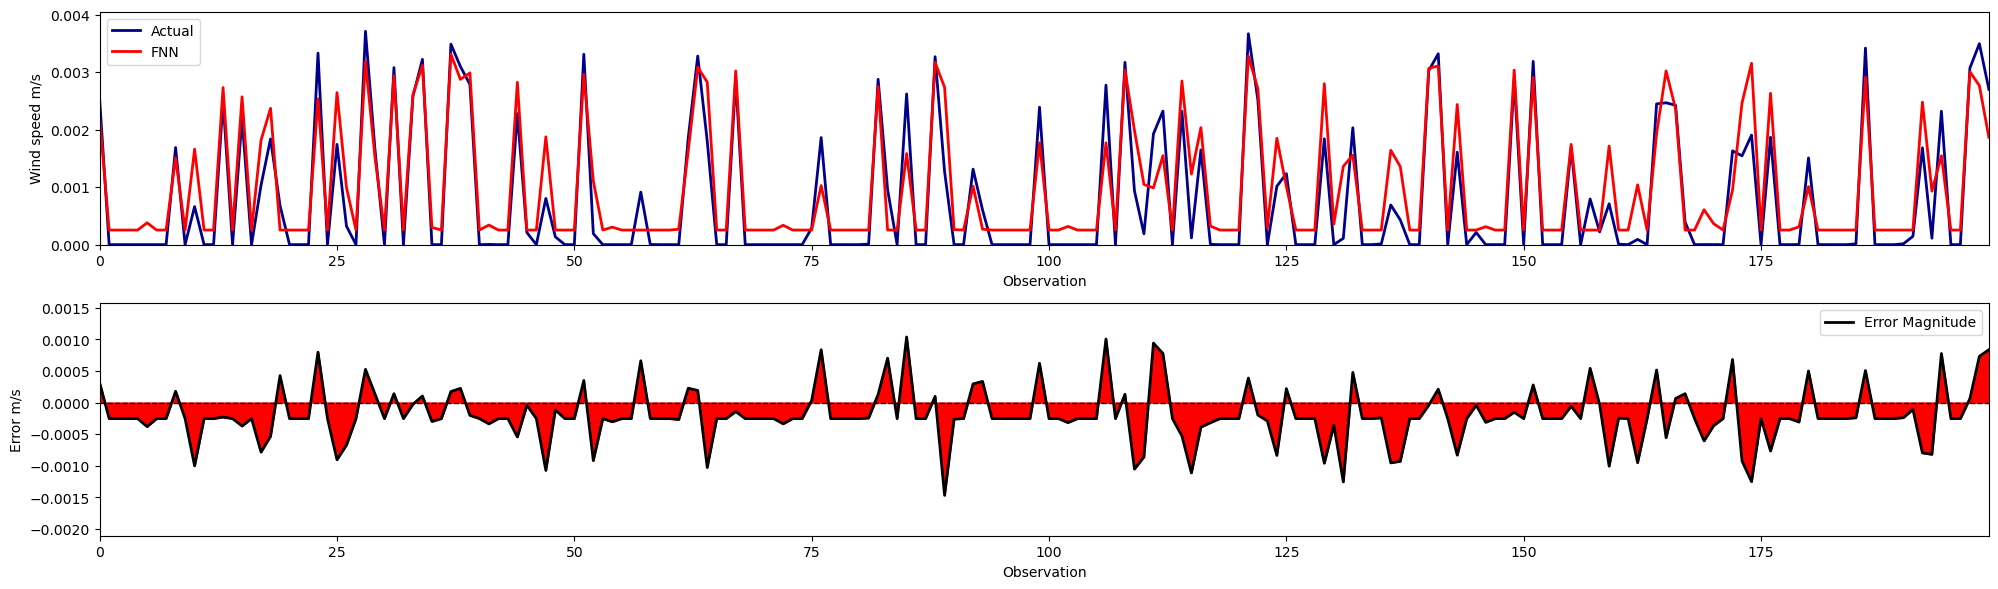

In [31]:
plot_actual_vs_predicted(test_y, predictions_dl, label='FNN')


In [32]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, SimpleRNN
# from tensorflow.keras.optimizers import Adam

# # Reshape input data to 3D for RNN (samples, timesteps, features)
# # Here we assume each sample is a single timestep
# train_X_scaled = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
# valid_X_scaled = np.reshape(valid_X_scaled, (valid_X_scaled.shape[0], 1, valid_X_scaled.shape[1]))
# test_X_scaled = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# # Define the RNN model architecture
# model_rnn = Sequential([
#     SimpleRNN(50, activation='relu', input_shape=(1, train_X_scaled.shape[2])),
#     Dense(1) # Output layer with one unit for regression
# ])

# # Compile the model
# model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# # Train the model
# history = model_rnn.fit(train_X_scaled, train_y, epochs=5, batch_size=8, validation_data=(valid_X_scaled, valid_y), verbose=1)

# # Make predictions on the test set
# predictions_rnn = model_rnn.predict(test_X_scaled)

# # Evaluate the model
# evaluate_model(predictions_rnn, test_y, "RNN Metrics Evaluation")

In [33]:
# plot_actual_vs_predicted(test_y, predictions_rnn, label='RNN')

In [34]:
num_features = train_X_scaled.shape[1]
num_features
train_X_scaled.shape

(215654, 3)

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D
from tensorflow.keras.optimizers import Adam

# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

# Function to scale the dataset
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = RobustScaler()
    X = scaler.fit_transform(X)
    X = X.reshape(X.shape[0], -1)  # Flatten for Dense layer input
    return X, y

# Assuming train, valid, and test are your dataframes
train_X_scaled, train_y = scale_dataset(train)
valid_X_scaled, valid_y = scale_dataset(valid)
test_X_scaled, test_y = scale_dataset(test)

# Print the shapes for debugging
print("Shape of train_X_scaled:", train_X_scaled.shape)
print("Shape of valid_X_scaled:", valid_X_scaled.shape)
print("Shape of test_X_scaled:", test_X_scaled.shape)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(train_X_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one unit for regression
])

# Compile the model with custom R² metric
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])

# Train the model
history = model.fit(train_X_scaled, train_y, epochs=10, batch_size=8, validation_data=(valid_X_scaled, valid_y), verbose=1)

# Make predictions on the test set
predictions = model.predict(test_X_scaled)

# Evaluate the model
results = model.evaluate(test_X_scaled, test_y, verbose=0)

# Print all metrics
metric_names = model.metrics_names
for i, metric_name in enumerate(metric_names):
    print(f"{metric_name}: {results[i]}")

# Assuming evaluate_model is defined elsewhere in your code
evaluate_model(predictions, test_y, "Model Metrics Evaluation")

Shape of train_X_scaled: (215654, 3)
Shape of valid_X_scaled: (71885, 3)
Shape of test_X_scaled: (71885, 3)
Epoch 1/10
26957/26957 [==============================] - 105s 4ms/step - loss: 2.4452e-05 - root_mean_squared_error: 0.0049 - r_squared: -78.4294 - val_loss: 4.2843e-07 - val_root_mean_squared_error: 6.5455e-04 - val_r_squared: 0.1717
Epoch 2/10
26957/26957 [==============================] - 101s 4ms/step - loss: 1.2537e-07 - root_mean_squared_error: 3.5407e-04 - r_squared: 0.8049 - val_loss: 1.8373e-07 - val_root_mean_squared_error: 4.2863e-04 - val_r_squared: 0.7663
Epoch 3/10
26957/26957 [==============================] - 101s 4ms/step - loss: 1.0536e-07 - root_mean_squared_error: 3.2459e-04 - r_squared: 0.8397 - val_loss: 2.6185e-07 - val_root_mean_squared_error: 5.1171e-04 - val_r_squared: 0.6094
Epoch 4/10
26957/26957 [==============================] - 78s 3ms/step - loss: 1.0205e-07 - root_mean_squared_error: 3.1945e-04 - r_squared: 0.8478 - val_loss: 1.8385e-07 - val_roo

Metric           Value
0     R²        0.871571
1   RMSE        0.001594
2  rRMSE        1.822147
3    MBE        0.000088
4   MABE        0.001184
5    MAE        0.000308
6    MSE        0.000000
7    AIC -1119731.443077

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D
from tensorflow.keras.optimizers import Adam

# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

# Function to scale the dataset
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = RobustScaler()
    X = scaler.fit_transform(X)
    X = X.reshape(X.shape[0], -1)  # Flatten for Dense layer input
    return X, y

# Assuming train, valid, and test are your dataframes
train_X_cnn, train_y = scale_dataset(train)
valid_X_scaled, valid_y = scale_dataset(valid)
test_X_cnn, test_y = scale_dataset(test)

# Print the shapes for debugging
print("Shape of train_X_scaled:", train_X_cnn.shape)
print("Shape of valid_X_scaled:", valid_X_scaled.shape)
print("Shape of test_X_scaled:", test_X_cnn.shape)


# Define the model architecture
model_cnn = Sequential([
    Dense(64, activation='relu', input_shape=(train_X_cnn.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one unit for regression
])


# Compile the model with custom R² metric
model_cnn.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])

# Train the CNN model
history = model_cnn.fit(train_X_cnn, train_y, epochs=10, batch_size=8, validation_split=0.2, verbose=1)

# Make predictions on the test set
predictions_cnn = model_cnn.predict(test_X_cnn)

# Evaluate the model
results = model_cnn.evaluate(test_X_cnn, test_y, verbose=0)

# Print all metrics
metric_names = model_cnn.metrics_names
for i, metric_name in enumerate(metric_names):
    print(f"{metric_name}: {results[i]}")

# Evaluate the model with custom function
evaluate_model(predictions_cnn, test_y, "CNN Metrics Evaluation")

Shape of train_X_scaled: (215654, 3)
Shape of valid_X_scaled: (71885, 3)
Shape of test_X_scaled: (71885, 3)
Epoch 1/10
21566/21566 [==============================] - 88s 4ms/step - loss: 2.6353e-05 - root_mean_squared_error: 0.0051 - r_squared: -42.9368 - val_loss: 6.8578e-08 - val_root_mean_squared_error: 2.6187e-04 - val_r_squared: 0.9134
Epoch 2/10
21566/21566 [==============================] - 83s 4ms/step - loss: 1.1423e-07 - root_mean_squared_error: 3.3797e-04 - r_squared: 0.8241 - val_loss: 1.1905e-07 - val_root_mean_squared_error: 3.4504e-04 - val_r_squared: 0.7792
Epoch 3/10
21566/21566 [==============================] - 80s 4ms/step - loss: 1.0547e-07 - root_mean_squared_error: 3.2477e-04 - r_squared: 0.8410 - val_loss: 1.2350e-07 - val_root_mean_squared_error: 3.5142e-04 - val_r_squared: 0.7996
Epoch 4/10
21566/21566 [==============================] - 69s 3ms/step - loss: 1.0215e-07 - root_mean_squared_error: 3.1961e-04 - r_squared: 0.8477 - val_loss: 6.5075e-08 - val_root_m

Metric           Value
0     R²        0.865733
1   RMSE        0.001621
2  rRMSE        1.853155
3    MBE        0.000074
4   MABE        0.001194
5    MAE        0.000285
6    MSE        0.000000
7    AIC -1116535.819085

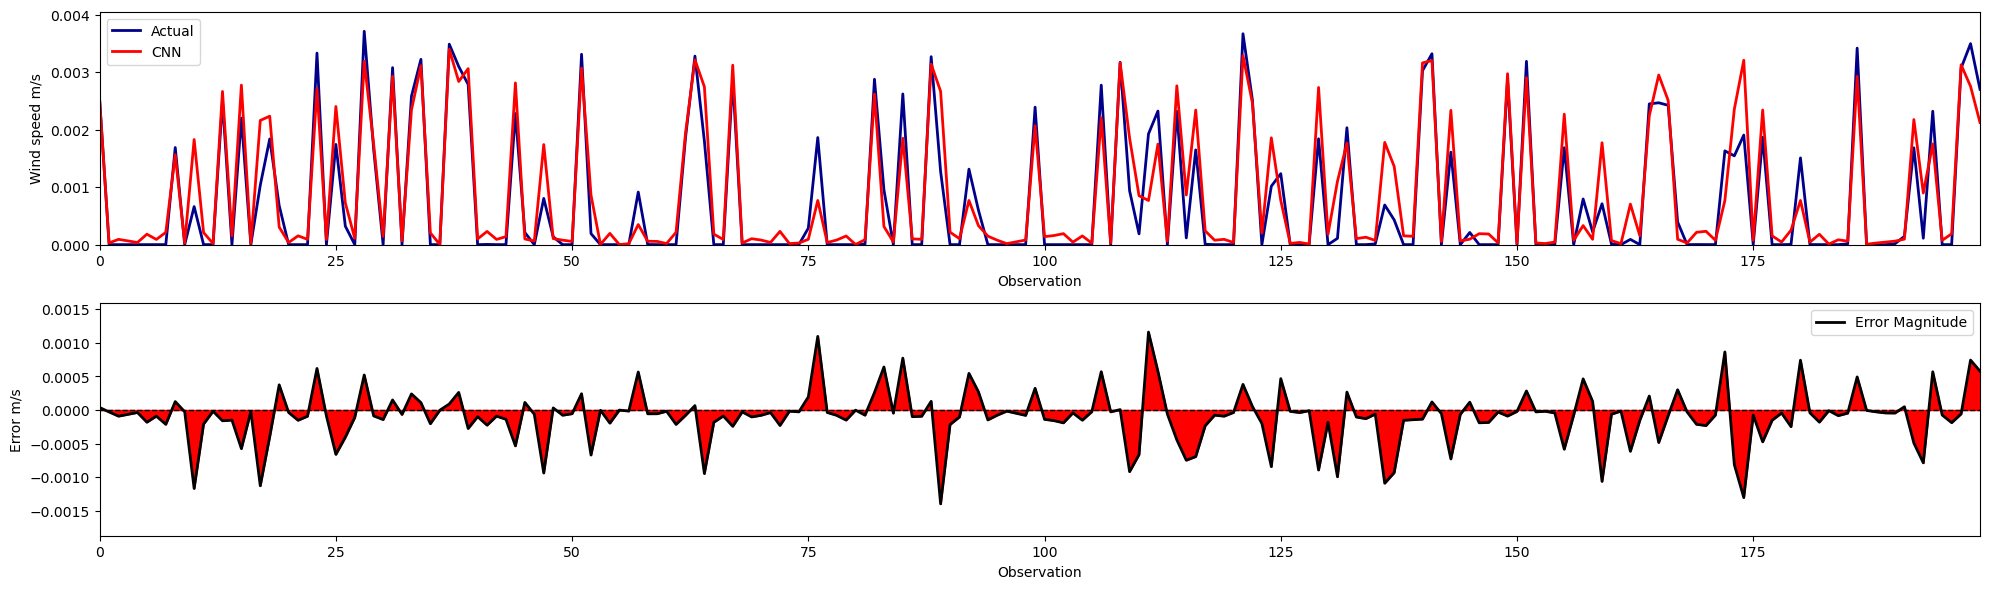

In [37]:
plot_actual_vs_predicted(test_y, predictions_cnn, label='CNN')


In [38]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# Initialize the CatBoost regressor
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=False)

# Fit the model to the training data
cat_model.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_catboost = cat_model.predict(test_X_scaled)

# Evaluate the model's performance
r2 = r2_score(test_y, predictions_catboost)
print(f"R-squared: {r2:.2f}")

# from sklearn.svm import SVR
# # Create and train the linear SVR model
# svr_poly = SVR(kernel='linear')
# svr_poly.fit(train_X_scaled, train_y)
# # Make predictions on the test set
# predictions_svm = svr_poly.predict(test_X_scaled)
evaluate_model(predictions_catboost, test_y, "Maroua Metrics Evaluation for catboost Model")


R-squared: 0.87
Maroua Metrics Evaluation for catboost Model
  Metric           Value
0     R²        0.871872
1   RMSE        0.000414
2  rRMSE        0.473185
3    MBE       -0.000022
4   MABE        0.000259
5    MAE        0.000259
6    MSE        0.000000
7    AIC -1119894.738774


Metric           Value
0     R²        0.871872
1   RMSE        0.000414
2  rRMSE        0.473185
3    MBE       -0.000022
4   MABE        0.000259
5    MAE        0.000259
6    MSE        0.000000
7    AIC -1119894.738774

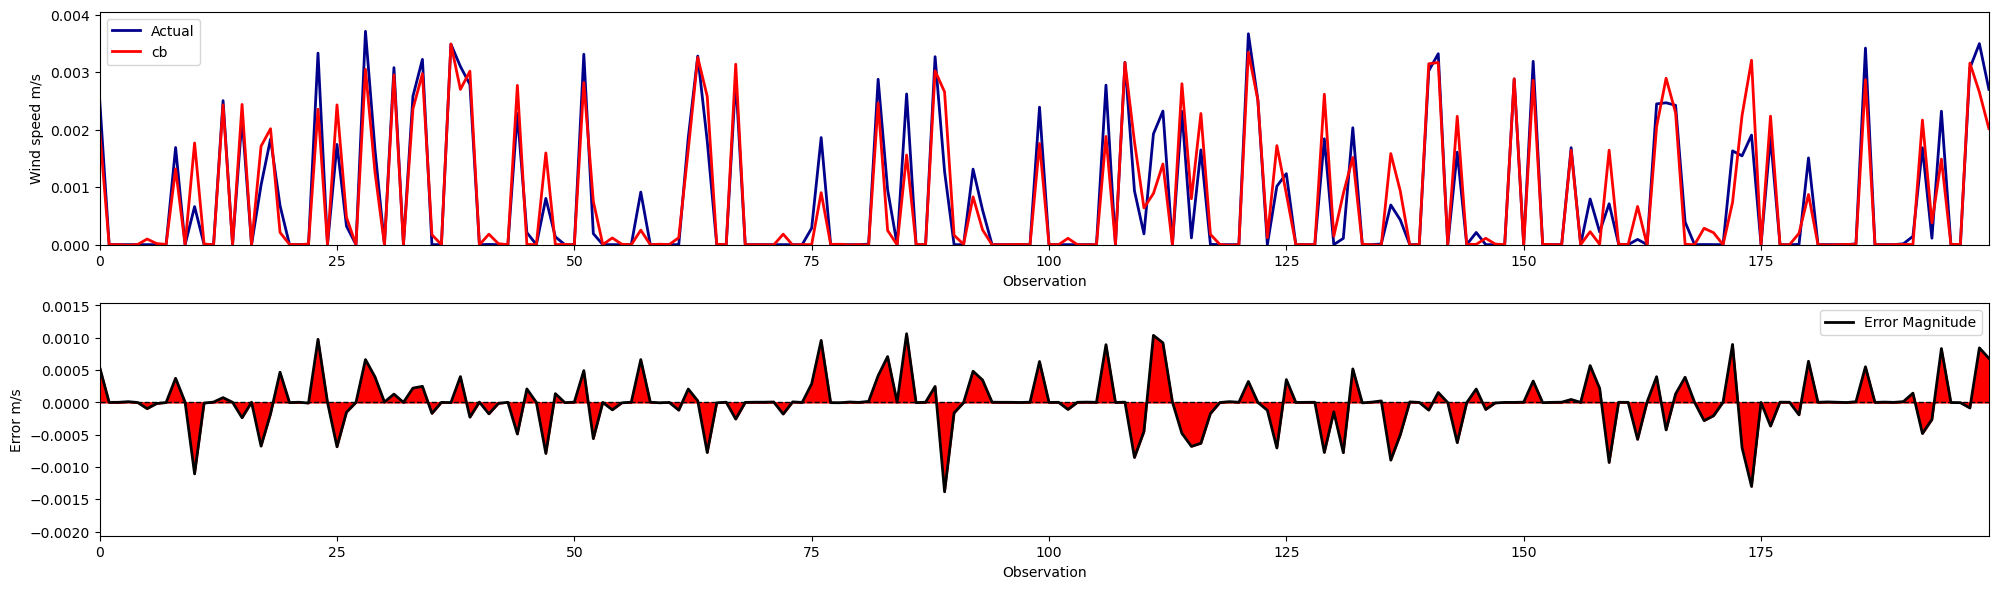

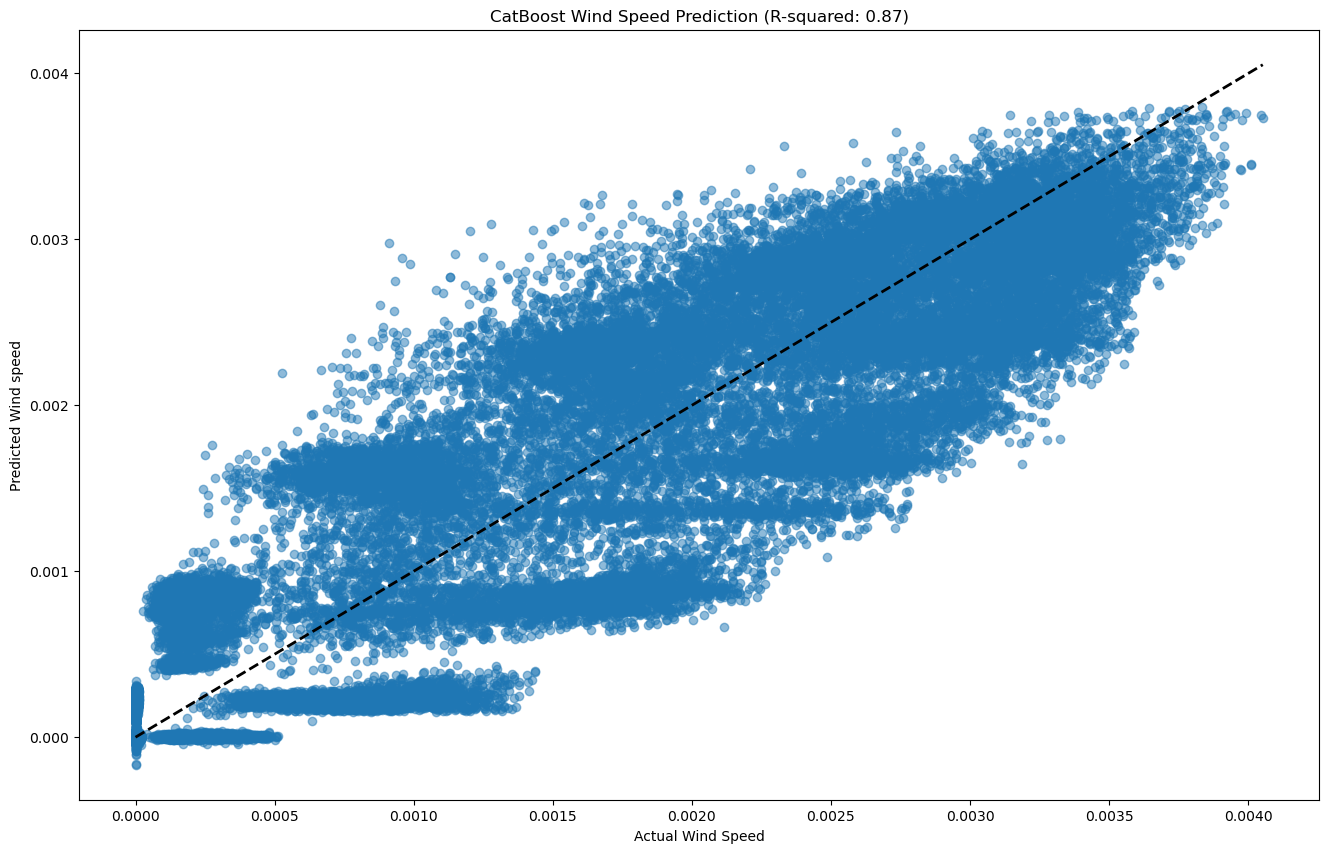

In [39]:
plot_actual_vs_predicted(test_y, predictions_catboost, label='cb')

# Create the scatter plot
plt.figure(figsize=(16, 10))
plt.scatter(test_y, predictions_catboost, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind speed')
plt.title(f'CatBoost Wind Speed Prediction (R-squared: {r2:.2f})')
plt.show()

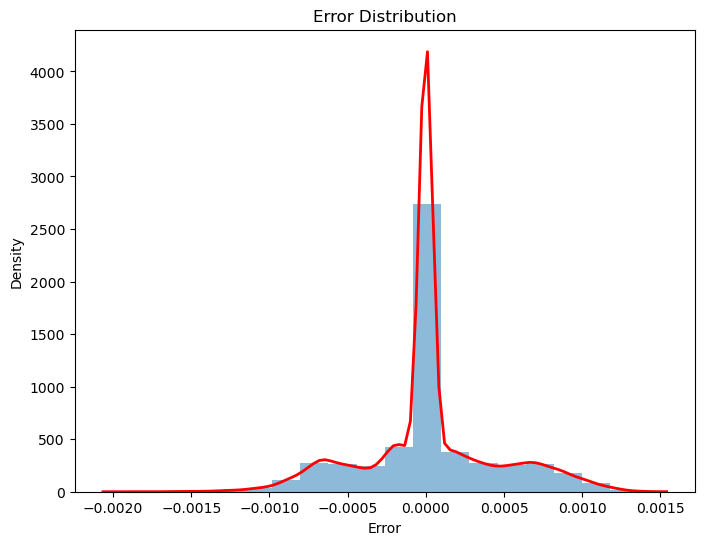

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from catboost import CatBoostRegressor


cat_model.fit(train_X_scaled, train_y)
# Get the predictions and calculate the errors
y_pred = predictions_catboost
errors = test_y - y_pred

# Calculate the Gaussian kernel density
density = gaussian_kde(errors)
x_grid = np.linspace(min(errors), max(errors), 100)
pdf = density.evaluate(x_grid)

# Create the histogram plot
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, density=True, alpha=0.5)
plt.plot(x_grid, pdf, lw=2, color='r')
plt.xlabel('Error')
plt.ylabel('Density')
plt.title('Error Distribution')
plt.show()

In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


# Initialize the XGBoost regressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, verbose=False)

# Fit the model to the training data
xgb_model.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_xgb = xgb_model.predict(test_X_scaled)

# Evaluate the model's performance
r2 = r2_score(test_y, predictions_xgb)
print(f"R-squared: {r2:.2f}")

evaluate_model(predictions_xgb, test_y, "Maroua Metrics Evaluation for xgb Model")


C:\Users\Millen\anaconda3\envs\tf\lib\site-packages\xgboost\core.py:160: UserWarning: [06:50:13] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


R-squared: 0.87
Maroua Metrics Evaluation for xgb Model
  Metric           Value
0     R²        0.870734
1   RMSE        0.000416
2  rRMSE        0.475292
3    MBE       -0.000019
4   MABE        0.000261
5    MAE        0.000261
6    MSE        0.000000
7    AIC -1119259.148997


Metric           Value
0     R²        0.870734
1   RMSE        0.000416
2  rRMSE        0.475292
3    MBE       -0.000019
4   MABE        0.000261
5    MAE        0.000261
6    MSE        0.000000
7    AIC -1119259.148997

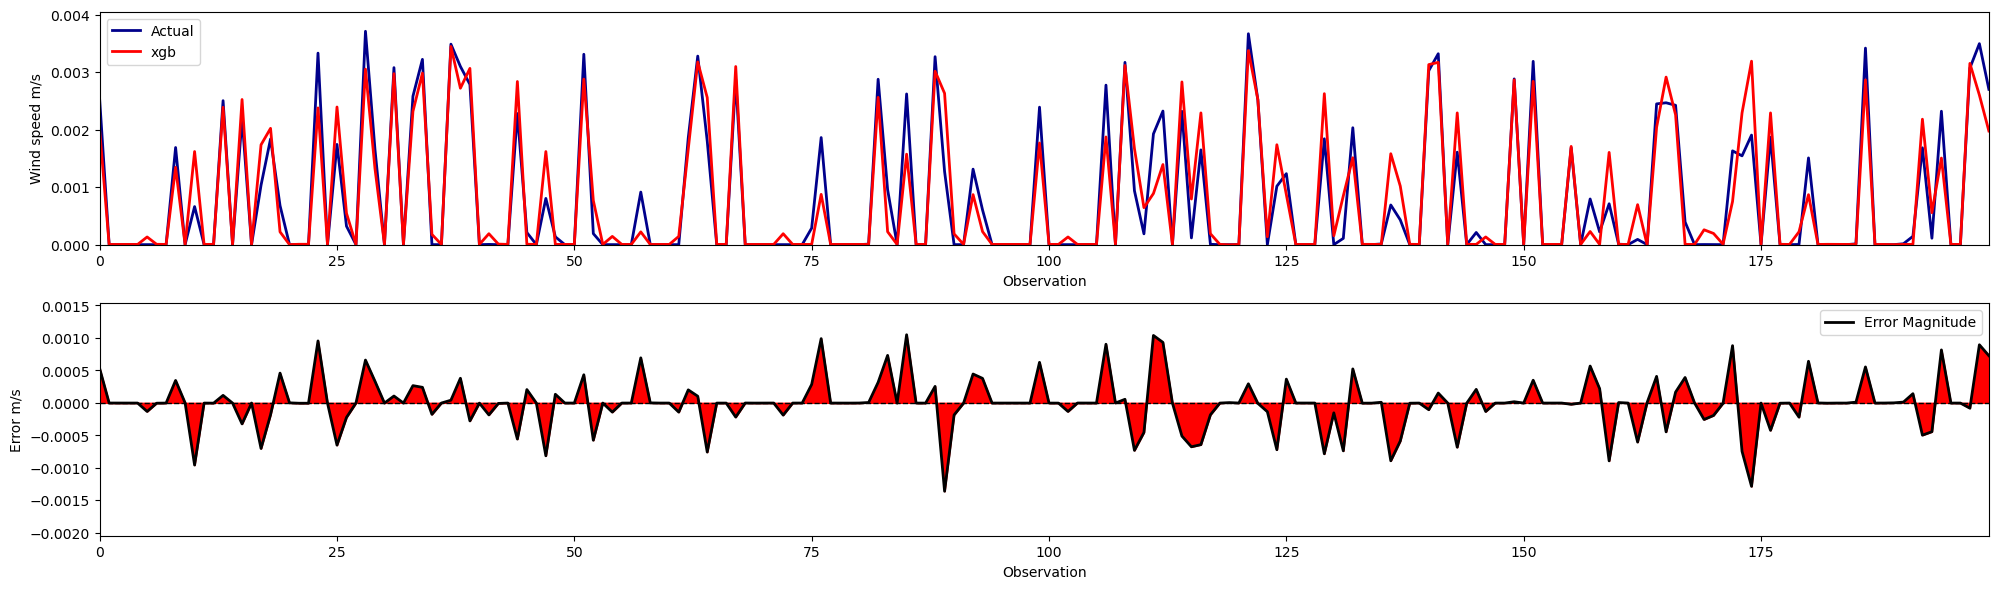

In [42]:
plot_actual_vs_predicted(test_y, predictions_xgb, label='xgb')

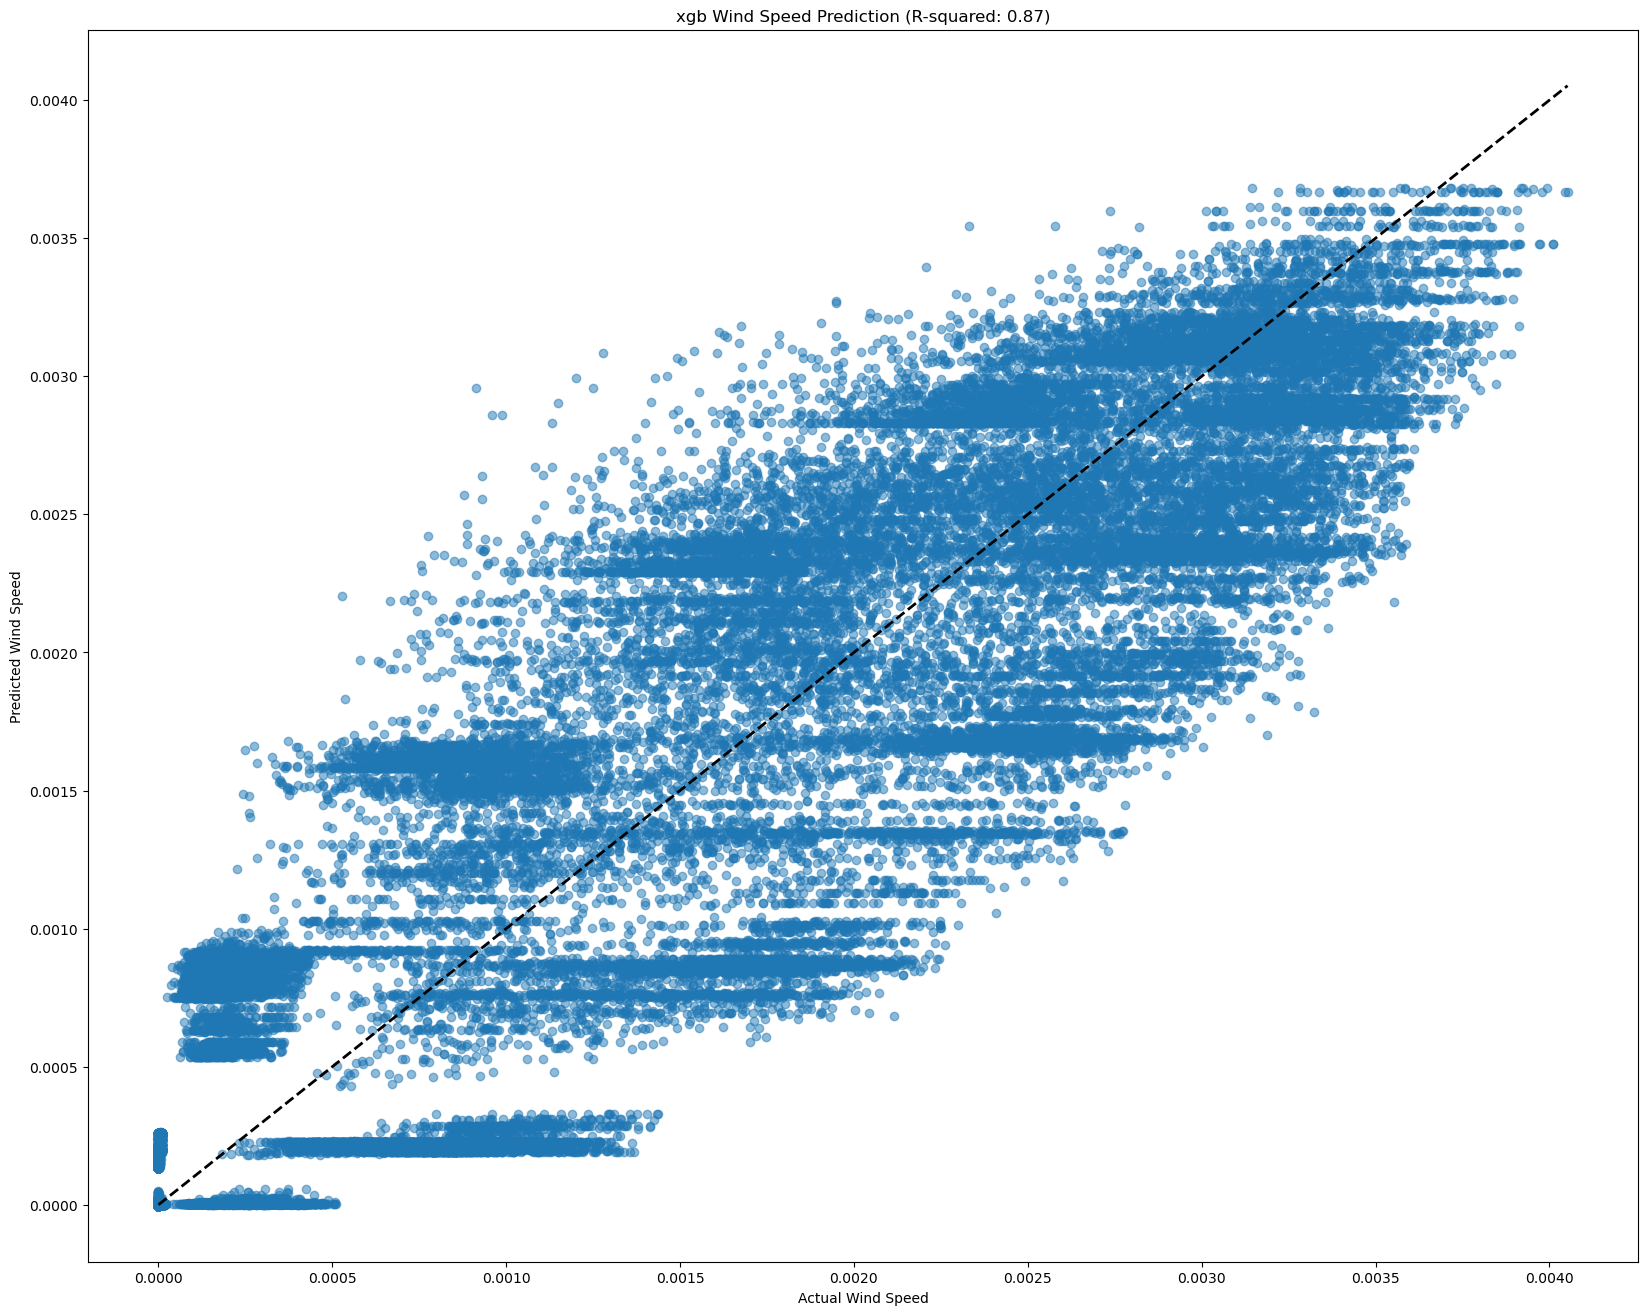

In [43]:
# Create the scatter plot
plt.figure(figsize=(20, 16))
plt.scatter(test_y, predictions_xgb, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title(f'xgb Wind Speed Prediction (R-squared: {r2:.2f})')
plt.show()

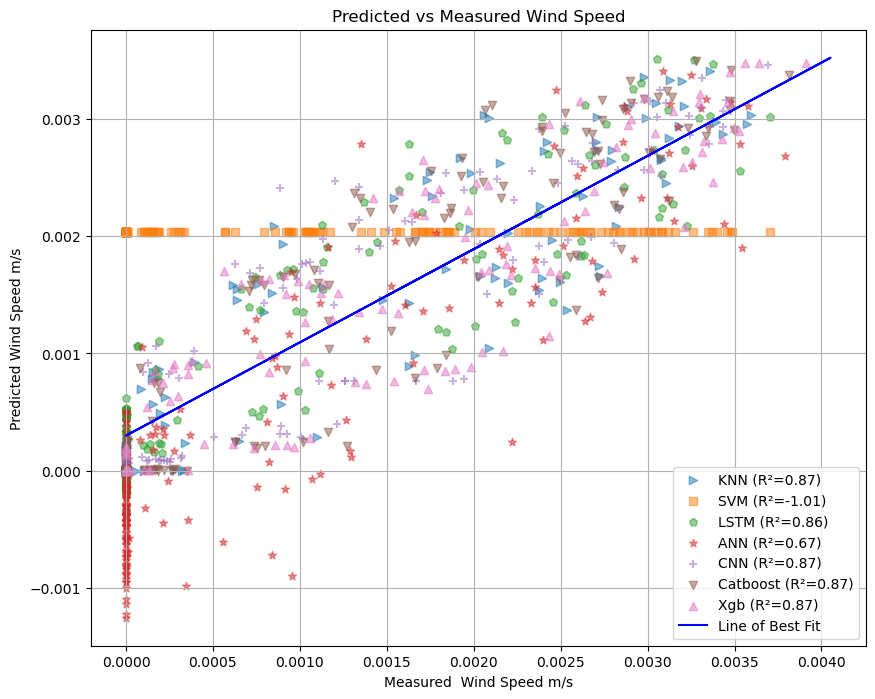

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Function to plot scatter plot for each model with different markers
def plot_predictions(test_y, predictions, model_name, marker, sample_size=200):
    # Randomly sample 200 points for plotting
    sample_indices = np.random.choice(len(test_y), size=sample_size, replace=False)
    test_y_sample = test_y[sample_indices].flatten()
    predictions_sample = predictions[sample_indices].flatten()

    # Calculate R^2 score
    r2 = r2_score(test_y, predictions)

    # Plot scatter plot with specific marker
    plt.scatter(test_y_sample, predictions_sample, label=f"{model_name} (R²={r2:.2f})", alpha=0.5, marker=marker)

# Define marker styles for different models
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'D', 'X', '+']

# Combine all predictions for a single line of best fit
all_predictions = np.concatenate([
    predictions_gbm.flatten(),
    predictions_svm.flatten(),
    predictions_knn.flatten(),
    predictions_lstm.flatten(),
    predictions_ann.flatten(),
    predictions_dl.flatten(),
    predictions_cnn.flatten(),
    predictions_catboost.flatten(),
    predictions_xgb.flatten(),
])

# Flatten test_y to match the shape of all_predictions
test_y_flat = np.tile(test_y.flatten(), len(all_predictions) // len(test_y.flatten()))

# Calculate the line of best fit for all predictions
z = np.polyfit(test_y_flat, all_predictions, 1)
p = np.poly1d(z)

# Plot settings
plt.figure(figsize=(10, 8))

# Plot scatter plot for each model with different markers
# plot_predictions(test_y, predictions_gbm, 'Gradient Boosting', markers[3])
plot_predictions(test_y, predictions_knn, 'KNN', markers[4])
plot_predictions(test_y, predictions_svm, 'SVM', markers[5])
plot_predictions(test_y, predictions_lstm, 'LSTM', markers[6])
plot_predictions(test_y, predictions_ann, 'ANN', markers[7])
# plot_predictions(test_y, predictions_dl, 'FNN', markers[8])
plot_predictions(test_y, predictions_cnn, 'CNN', markers[10])
plot_predictions(test_y, predictions_catboost, 'Catboost', markers[1])
plot_predictions(test_y, predictions_xgb, 'Xgb', markers[2])

# Plot line of best fit for all predictions in blue
plt.plot(test_y, p(test_y.flatten()), color='blue', label='Line of Best Fit')

# Plot settings
plt.xlabel('Measured  Wind Speed m/s')
plt.ylabel('Predicted Wind Speed m/s')
plt.title('Predicted vs Measured Wind Speed')
plt.legend()
plt.grid(True)
plt.show()